https://www.kaggle.com/code/nizdarlaila/pose-estimation-using-mediapipe

In [ ]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


In [ ]:
import cv2 #to read and process images
import matplotlib.pyplot as plt #to show resultant images
import mediapipe as mp
import ntpath

# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose
# Setting up the Pose model for images.
pose_img = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0, model_complexity=1)
# Setting up the Pose model for videos.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5,
                          min_tracking_confidence=0.5, model_complexity=1)

# Initializing mediapipe drawing class to draw landmarks on specified image.
mp_drawing = mp.solutions.drawing_utils

In [ ]:
def estimPose_img(input_file, file_name="", pose=pose_img, landmarks_c=(234,63,247), connection_c=(117,249,77),
                   thickness=5, circle_r=1, display=True, save=False, output_path = "/content/detections/"):

    # Read the input image
    if isinstance(input_file, str) :
        input_img = cv2.imread(input_file)
    else :
        input_img = input_file

    # Create a copy of the input image
    output_img = input_img.copy()

    # Convert the image from BGR into RGB format.
    RGB_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

    # Perform the Pose Detection.
    results = pose.process(RGB_img)

    # Retrieve the height and width of the input image.
    height, width, _ = input_img.shape

    # Initialize a list to store the detected landmarks.
    landmarks = []

    # Check if any landmarks are detected.
    if results.pose_landmarks:

        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(output_img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(landmarks_c, thickness, circle_r),
                                  mp_drawing.DrawingSpec(connection_c, thickness, circle_r))

        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))

    # check if we want to save output image
    if save:
      # TODO file format etc
      if isinstance(input_file, str) :
        img_name = ntpath.basename(input_file).replace(".jpg","")
      else:
        img_name = ntpath.basename(file_name).replace(".jpg","")
      location = f"{output_path}{img_name}_detection.jpg"
      cv2.imwrite(location, output_img)

    # Check if we want to display.
    if display:
        # Display the original input image and the resulting image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(input_img[:,:,::-1]);plt.title("Original image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_img[:,:,::-1]);plt.title("Output image");plt.axis('off');

        # Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

    # Just get output_img and landmarks
    else:
        # Return the output image and the found landmarks.
        return output_img, landmarks


In [ ]:
import os
for subdir, dirs, files in os.walk("/content/images/"):
    for file in files:
        estimPose_img(os.path.join(subdir, file), save=True, display=False)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
!zip -r /content/MediaPipe_detections.zip /content/detections

from google.colab import files
files.download("/content/MediaPipe_detections.zip")

  adding: content/detections/ (stored 0%)
  adding: content/detections/DJI_0048_3_detection.jpg (deflated 0%)
  adding: content/detections/DJI_0025_4_detection.jpg (deflated 0%)
  adding: content/detections/DJI_0048_2_detection.jpg (deflated 0%)
  adding: content/detections/DJI_0017_4_detection.jpg (deflated 0%)
  adding: content/detections/DJI_0025_2_detection.jpg (deflated 0%)
  adding: content/detections/DJI_0016_5_detection.jpg (deflated 0%)
  adding: content/detections/DJI_0007_2_detection.jpg (deflated 0%)
  adding: content/detections/DJI_0021_2_detection.jpg (deflated 0%)
  adding: content/detections/DJI_0014_2_detection.jpg (deflated 0%)
  adding: content/detections/DJI_0014_4_detection.jpg (deflated 0%)
  adding: content/detections/DJI_0018_6_detection.jpg (deflated 0%)
  adding: content/detections/DJI_0025_5_detection.jpg (deflated 0%)
  adding: content/detections/DJI_0039_1_detection.jpg (deflated 0%)
  adding: content/detections/DJI_0021_4_detection.jpg (deflated 0%)
  addi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# model_complexity=1 vs model_complexity=2

In [ ]:
pose1 = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=1)
pose2 = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2)

In [ ]:
def compl1_vs_compl2(input_file, pose1=pose1, pose2=pose2):
    output_img1, _ = estimPose_img(input_file, pose=pose1, display=False)
    output_img2, _ = estimPose_img(input_file, pose=pose2, display=False)

    plt.figure(figsize=[15,15])
    plt.subplot(121);plt.imshow(output_img1[:,:,::-1]);plt.title("Output image model_complexity=1");plt.axis('off');
    plt.subplot(122);plt.imshow(output_img2[:,:,::-1]);plt.title("Output image model_complexity=2");plt.axis('off');

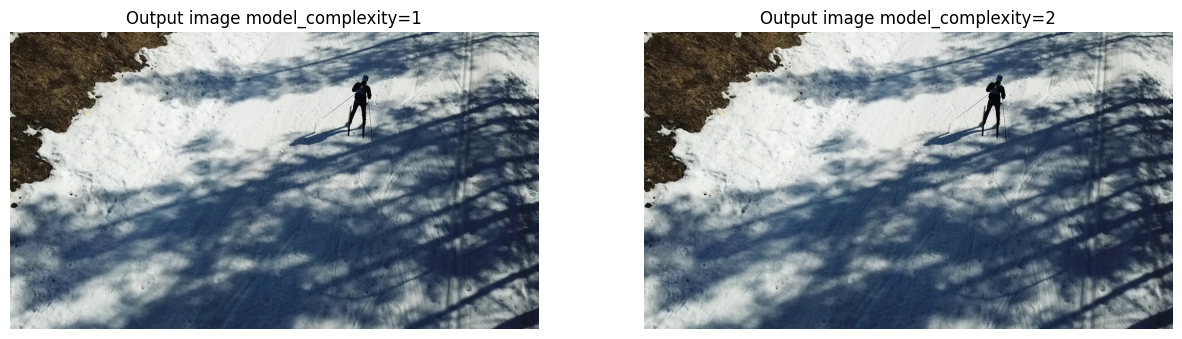

In [ ]:
compl1_vs_compl2('/content/images/DJI_1005_6.jpg')

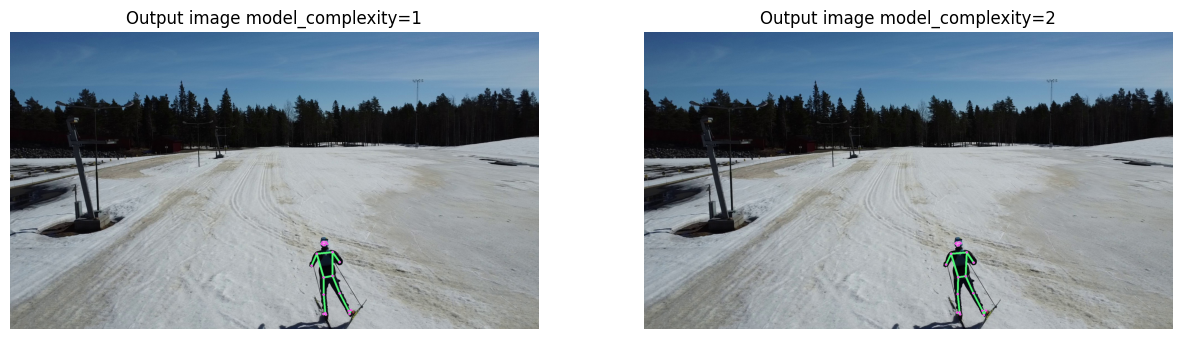

In [ ]:
compl1_vs_compl2('/content/images/DJI_0007_2.jpg')

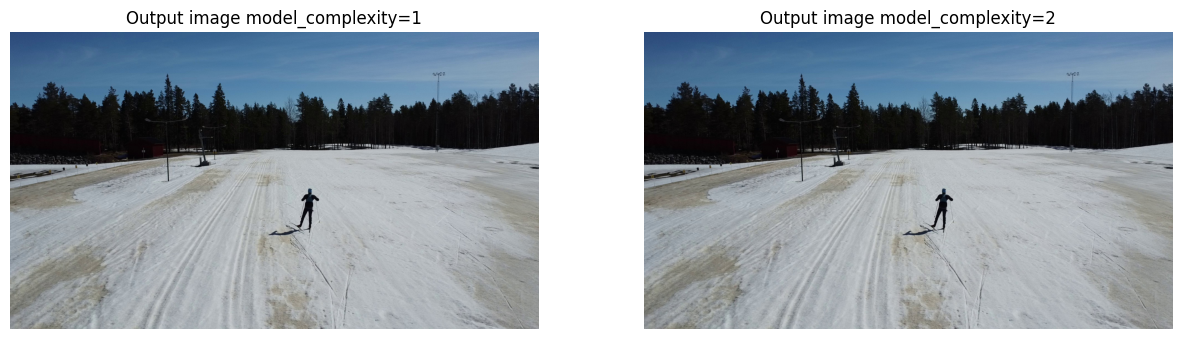

In [ ]:
compl1_vs_compl2('/content/images/DJI_0007_3.jpg')

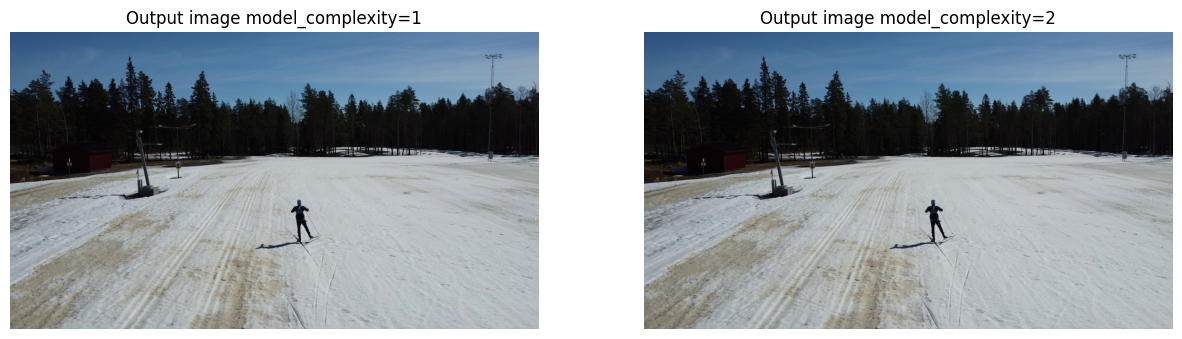

In [ ]:
compl1_vs_compl2('/content/images/DJI_0007_4.jpg')

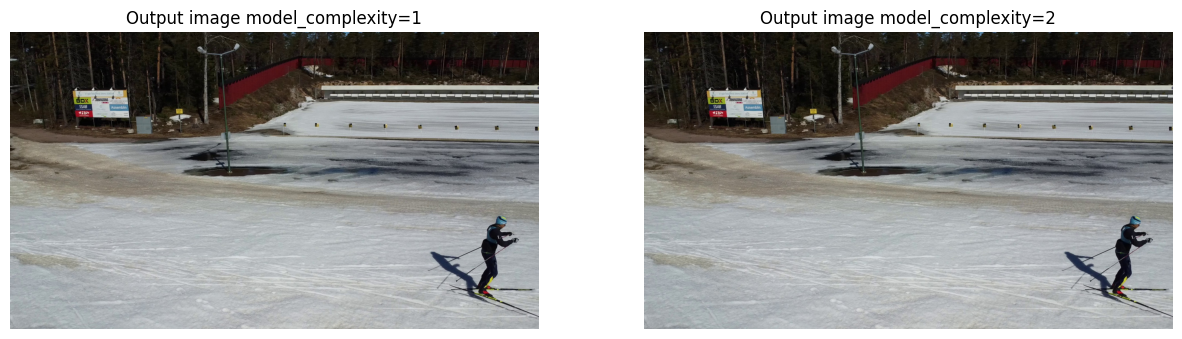

In [ ]:
compl1_vs_compl2('/content/images/DJI_0016_2.jpg')

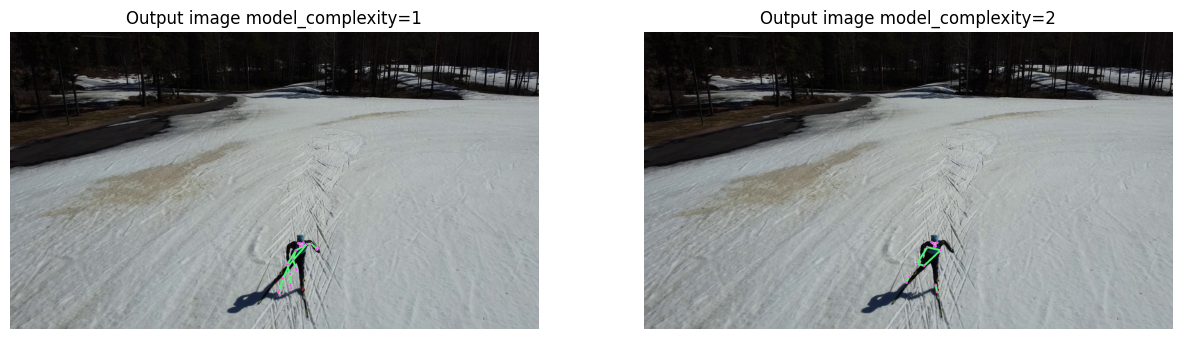

In [ ]:
compl1_vs_compl2('/content/images/DJI_0025_2.jpg')

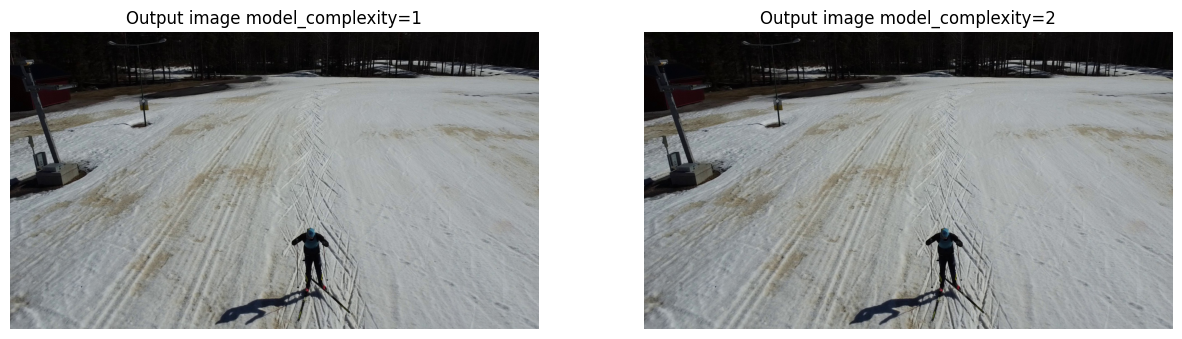

In [ ]:
compl1_vs_compl2('/content/images/DJI_0025_3.jpg')

# MediaPipe for videos

In [ ]:
def estimPose_video(input_file, pose_video=pose_video, landmarks_c=(234,63,247), connection_c=(117,249,77),
                 thickness=5, circle_r=5, display=True, nrows_frames=4, ncols_frames=3, required_frame_rate = 0, start_from_sec = 0, save=False, output_path="/content/vid_detections/"):

    # Initialize the VideoCapture object to read from a video stored in the disk.
    video = cv2.VideoCapture(input_file)
    sec = start_from_sec

    #total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    frames = []
    count = 1
    while (video.isOpened()):
      # Read a frame.
        ok, frame = video.read()

        # Check if frame is not read properly.
        if not ok:
            # Break the loop.
            break

        # Get the width and height of the frame
        frame_height, frame_width, _ =  frame.shape
        # Resize the frame while keeping the aspect ratio.
        frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
        file_name = ntpath.basename(input_file).replace(".MP4","")
        file_name = f"{count}_{file_name}"
        frame, _ = estimPose_img(frame, file_name, pose_video, landmarks_c, connection_c, thickness,
                              circle_r, display=False, save=save, output_path=output_path)

        frames.append(frame)
        # TODO!!
        #sec += required_frame_rate
        #video.set(cv2.CAP_PROP_POS_MSEC, sec * 1000)
        count += 1

    if display :
        fig, axarr = plt.subplots(nrows_frames,ncols_frames,figsize=[15, 15])
        k=0
        for i in range(nrows_frames):
            for j in range(ncols_frames):
                axarr[i,j].imshow(frames[k][:,:,::-1]);axarr[i,j].axis('off')
                k+=1
    else:
        return frames

In [ ]:
estimPose_video("/content/videos/DJI_0002.MP4", nrows_frames=4, ncols_frames=5, display=False, save=True)

[array([[[ 54,  54,  54],
         [ 69,  52,  46],
         [ 83,  64,  55],
         ...,
         [ 24,  20,  21],
         [ 23,  15,  17],
         [ 34,  26,  28]],
 
        [[ 51,  48,  42],
         [ 68,  51,  38],
         [101,  82,  66],
         ...,
         [ 39,  33,  32],
         [ 60,  55,  54],
         [ 22,  15,  12]],
 
        [[ 62,  43,  36],
         [ 52,  19,   6],
         [ 81,  45,  29],
         ...,
         [ 77,  65,  61],
         [102,  82,  77],
         [ 83,  58,  51]],
 
        ...,
 
        [[ 78,  90, 105],
         [ 67,  82,  96],
         [ 84, 100, 114],
         ...,
         [186, 168, 160],
         [192, 173, 165],
         [187, 169, 161]],
 
        [[104, 118, 132],
         [ 93, 109, 123],
         [118, 136, 150],
         ...,
         [186, 169, 161],
         [197, 179, 171],
         [191, 173, 165]],
 
        [[125, 143, 157],
         [ 96, 117, 130],
         [ 82, 103, 116],
         ...,
         [150, 132, 124],
  

# Regenerate video out of frames


In [ ]:
import re

numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

path = '/content/vid_detections/'
out_path = '/content/'
out_video_name = "MediaPipeVideo.mp4"
out_video_path = out_path + out_video_name

pre_imgs = sorted(os.listdir(path), key=numericalSort)
img = []

for i in pre_imgs:
  i = path+i
  img.append(i)

cv2_fourcc = cv2.VideoWriter_fourcc(*'mp4v')

frame = cv2.imread(img[0])
size = list(frame.shape)
del size[2]
size.reverse()
print(size)

video = cv2.VideoWriter(out_video_path, cv2_fourcc, 30, size)

for i in range(len(img)):
  video.write(cv2.imread(img[i]))
  print('frame ', i+1, ' of ', len(img))

video.release()

[1137, 640]
frame  1  of  916
frame  2  of  916
frame  3  of  916
frame  4  of  916
frame  5  of  916
frame  6  of  916
frame  7  of  916
frame  8  of  916
frame  9  of  916
frame  10  of  916
frame  11  of  916
frame  12  of  916
frame  13  of  916
frame  14  of  916
frame  15  of  916
frame  16  of  916
frame  17  of  916
frame  18  of  916
frame  19  of  916
frame  20  of  916
frame  21  of  916
frame  22  of  916
frame  23  of  916
frame  24  of  916
frame  25  of  916
frame  26  of  916
frame  27  of  916
frame  28  of  916
frame  29  of  916
frame  30  of  916
frame  31  of  916
frame  32  of  916
frame  33  of  916
frame  34  of  916
frame  35  of  916
frame  36  of  916
frame  37  of  916
frame  38  of  916
frame  39  of  916
frame  40  of  916
frame  41  of  916
frame  42  of  916
frame  43  of  916
frame  44  of  916
frame  45  of  916
frame  46  of  916
frame  47  of  916
frame  48  of  916
frame  49  of  916
frame  50  of  916
frame  51  of  916
frame  52  of  916
frame  53

In [ ]:
import imageio
# Get frames after pose estimation and then create a GIF file with those frames.

# Get resulting frames after pose estimation.
frames = estimPose_video("/content/videos/DJI_0002.MP4", display=False)
# Create a GIF file from this frames.
imageio.mimsave('skier_mediaPipe_test.gif', frames, fps=30)